In [4]:
from time import time
import unittest
import numpy as np
from sklearn.metrics import silhouette_score
from statsmodels.tools.eval_measures import rmse

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0' 

from keras.datasets import mnist
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import ConvAE

In [5]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
numClass = 10
sizeDigit = xTrain.shape[1:]

dimInput = [*xTrain.shape[1:], 1]
xTrain = xTrain.reshape((numTrain, *dimInput))
xTest = xTest.reshape((numTest, *dimInput))
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Default parameters

In [6]:
pathTempBest = '../model/temp/'
convAE = ConvAE(dimInput)
history, timeTrain = convAE.fit(xTrain, xTest, 
                                pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 24s 408us/step - loss: 0.2284 - val_loss: 0.2086

Epoch 00001: val_loss improved from inf to 0.20864, saving model to ../model/temp//AutoEncoder1536633367.6900446.hdf5
Epoch 2/50
60000/60000 [==============================] - 22s 364us/step - loss: 0.2173 - val_loss: 0.2056

Epoch 00002: val_loss improved from 0.20864 to 0.20564, saving model to ../model/temp//AutoEncoder1536633367.6900446.hdf5
Epoch 3/50
60000/60000 [==============================] - 22s 360us/step - loss: 0.2154 - val_loss: 0.2050

Epoch 00003: val_loss improved from 0.20564 to 0.20503, saving model to ../model/temp//AutoEncoder1536633367.6900446.hdf5
Epoch 4/50
60000/60000 [==============================] - 22s 359us/step - loss: 0.2143 - val_loss: 0.2038

Epoch 00004: val_loss improved from 0.20503 to 0.20384, saving model to ../model/temp//AutoEncoder1536633367.6900446.hdf5
Epoch 5/50
60000/60000 [==========

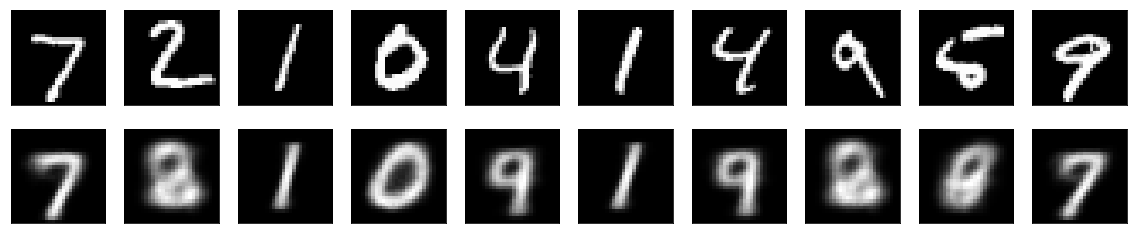

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16093749
total RMSE of each pixel:  0.21558356


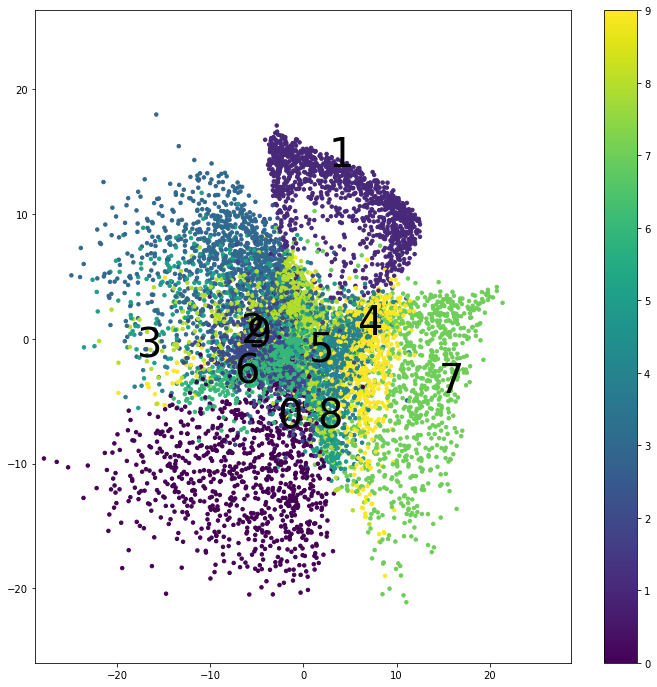

Silhouette score:  0.01685135


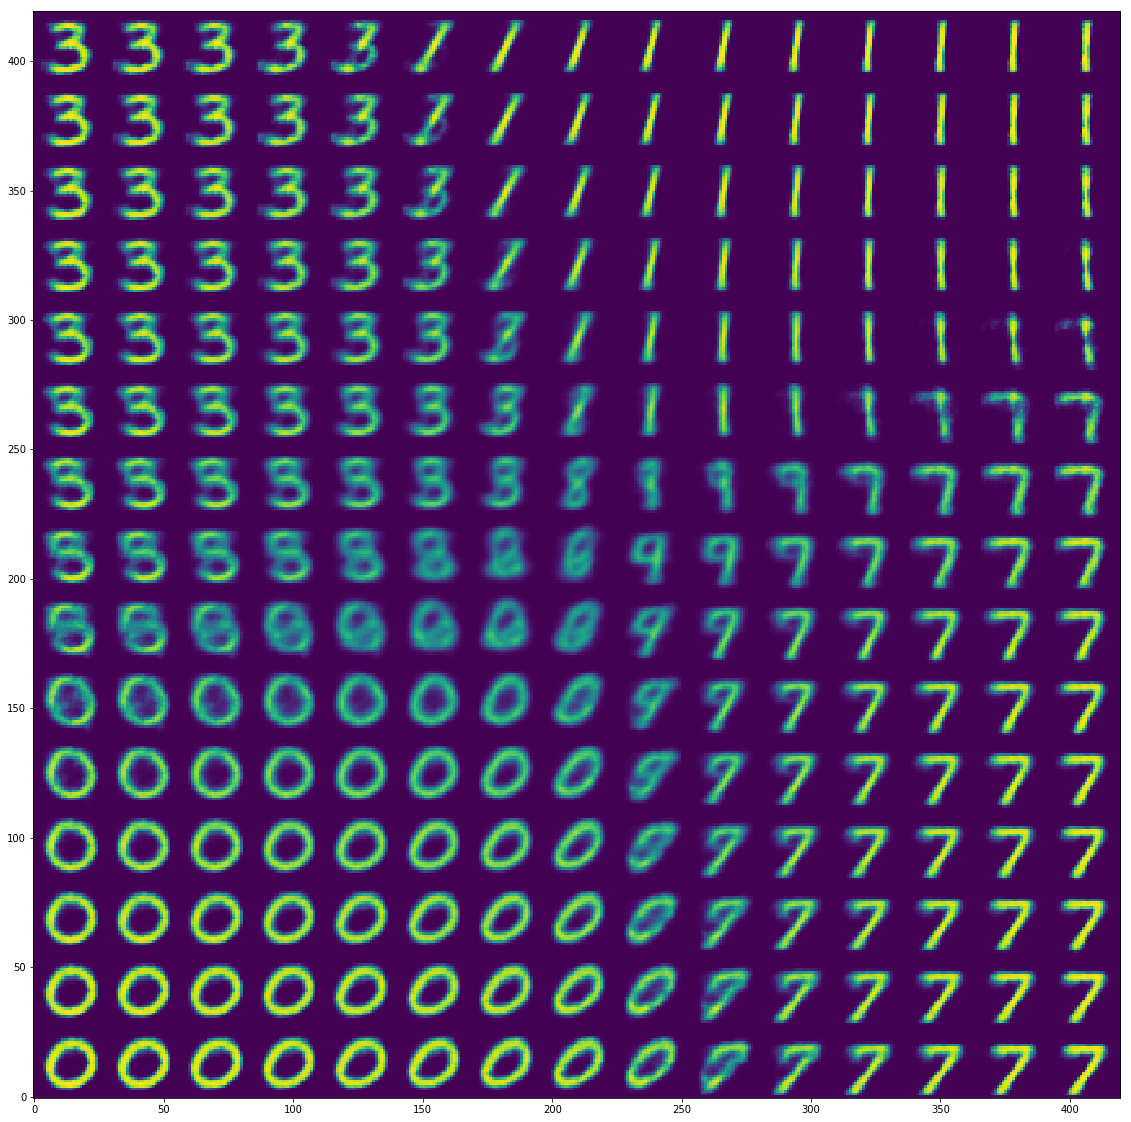

In [8]:
encoder = convAE.encoder
decoder = convAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Without batch normalization

In [13]:
convAE = ConvAE(dimInput,  batchNorm=False)
history, timeTrain = convAE.fit(xTrain, xTest, 
                                pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 17s 283us/step - loss: 0.2338 - val_loss: 0.2094

Epoch 00001: val_loss improved from inf to 0.20943, saving model to ../model/temp//AutoEncoder1536636282.9380693.hdf5
Epoch 2/50
60000/60000 [==============================] - 14s 241us/step - loss: 0.2115 - val_loss: 0.2042

Epoch 00002: val_loss improved from 0.20943 to 0.20420, saving model to ../model/temp//AutoEncoder1536636282.9380693.hdf5
Epoch 3/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.2078 - val_loss: 0.2000

Epoch 00003: val_loss improved from 0.20420 to 0.19996, saving model to ../model/temp//AutoEncoder1536636282.9380693.hdf5
Epoch 4/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.2054 - val_loss: 0.1982

Epoch 00004: val_loss improved from 0.19996 to 0.19825, saving model to ../model/temp//AutoEncoder1536636282.9380693.hdf5
Epoch 5/50
60000/60000 [==========

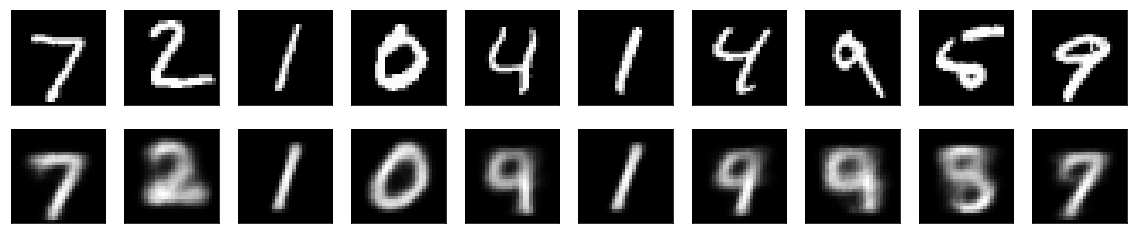

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.15622342
total RMSE of each pixel:  0.20924015


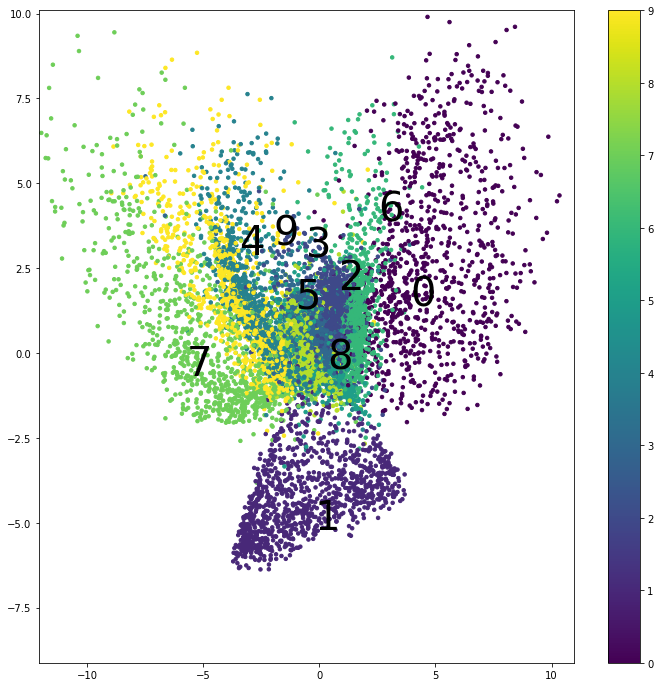

Silhouette score:  0.010073801


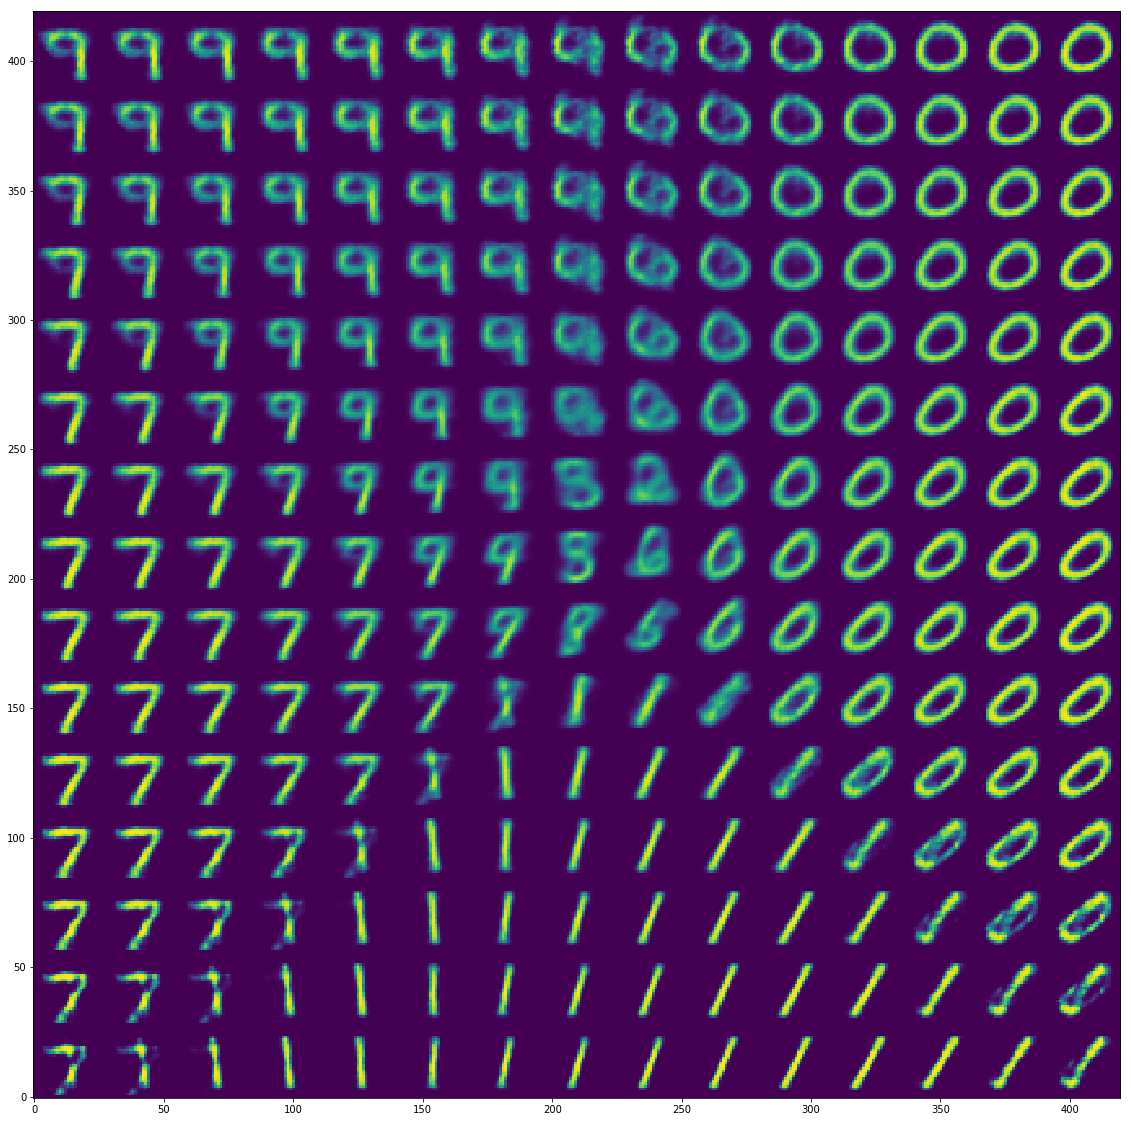

In [14]:
encoder = convAE.encoder
decoder = convAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Deeper for dense layers

In [15]:
layerDense = [128, 32, 8, 2]

convAE = ConvAE(dimInput, layerDense=layerDense)
history, timeTrain = convAE.fit(xTrain, xTest, 
                                pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 43s 724us/step - loss: 0.2632 - val_loss: 0.2271

Epoch 00001: val_loss improved from inf to 0.22713, saving model to ../model/temp//AutoEncoder1536636700.3258038.hdf5
Epoch 2/50
60000/60000 [==============================] - 36s 599us/step - loss: 0.2348 - val_loss: 0.2187

Epoch 00005: val_loss improved from 0.22000 to 0.21867, saving model to ../model/temp//AutoEncoder1536636700.3258038.hdf5
Epoch 6/50
60000/60000 [==============================] - 36s 601us/step - loss: 0.2338 - val_loss: 0.2175

Epoch 00006: val_loss improved from 0.21867 to 0.21747, saving model to ../model/temp//AutoEncoder1536636700.3258038.hdf5
Epoch 7/50
60000/60000 [==============================] - 36s 601us/step - loss: 0.2334 - val_loss: 0.2178

Epoch 00007: val_loss did not improve from 0.21747
Epoch 8/50
60000/60000 [==============================] - 36s 600us/step - loss: 0.2332 - val_loss: 0.217

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



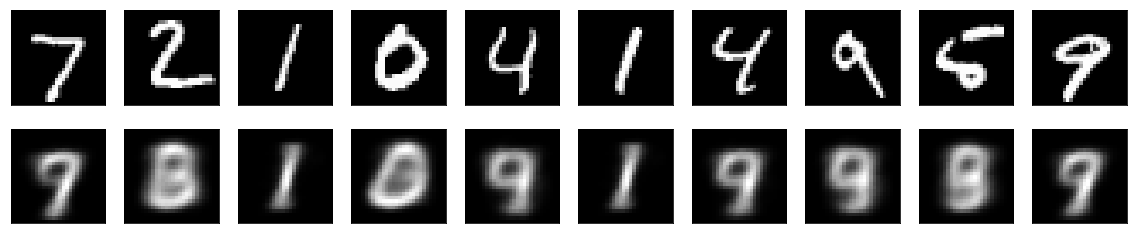

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.17070496
total RMSE of each pixel:  0.22961731


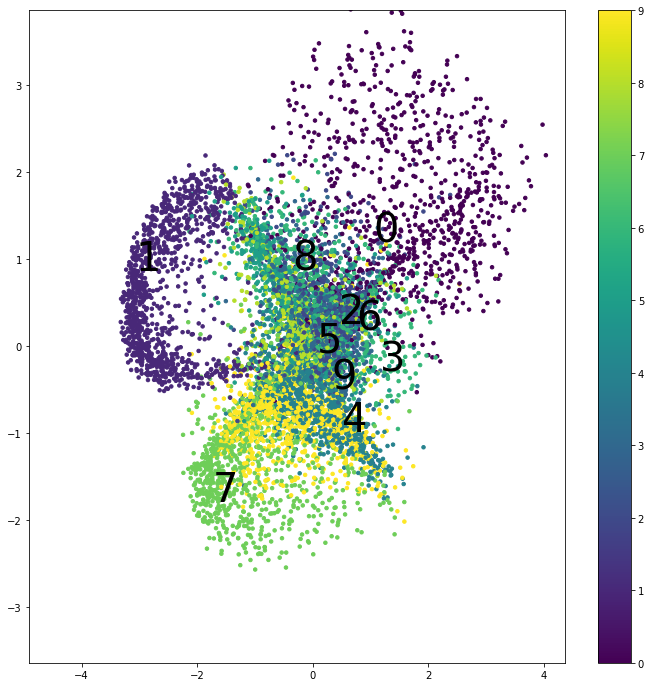

Silhouette score:  -0.0047557917


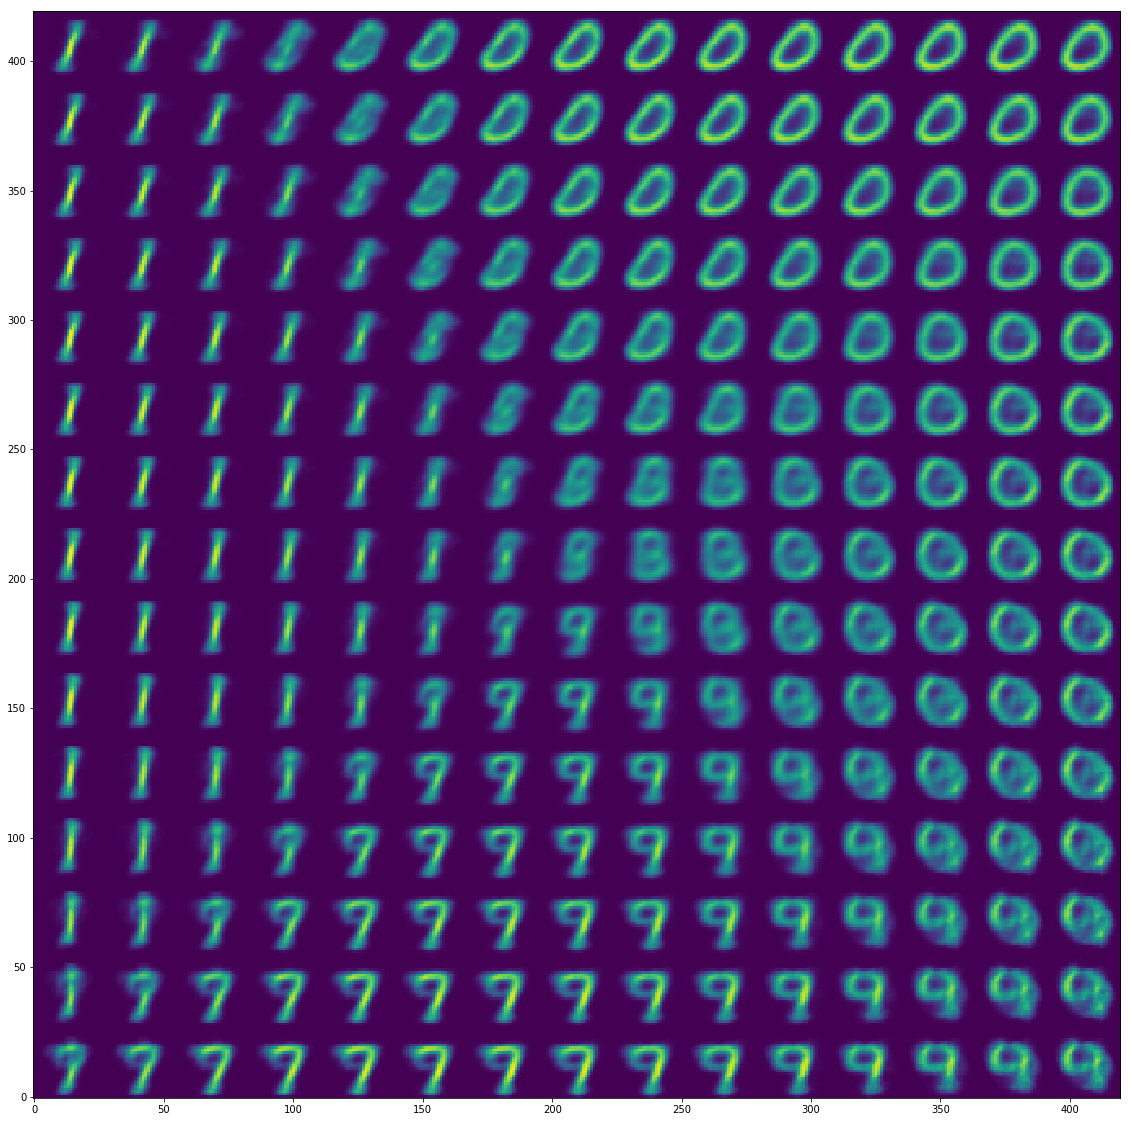

In [16]:
encoder = convAE.encoder
decoder = convAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Complex for conv and dense layers

In [17]:
layerDense = [1024, 128, 16, 2]
layerConv=[8, 64]

convAE = ConvAE(dimInput, layerDense=layerDense, layerConv=layerConv)
convAE.encoder.summary()
convAE.decoder.summary()
history, timeTrain = convAE.fit(xTrain, xTest, 
                                pathTempBest=pathTempBest)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         80        
_________________________________________________________________
batch_normalization_27 (Batc (None, 14, 14, 8)         32        
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          4672      
_________________________________________________________________
batch_normalization_28 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 7, 7, 64)          0         
__________

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



60000/60000 [==============================] - 37s 612us/step - loss: 0.2170 - val_loss: 0.2034

Epoch 00012: val_loss improved from 0.20425 to 0.20341, saving model to ../model/temp//AutoEncoder1536637206.7503655.hdf5
Epoch 13/50
60000/60000 [==============================] - 37s 611us/step - loss: 0.2168 - val_loss: 0.2051

Epoch 00013: val_loss did not improve from 0.20341
Epoch 14/50
60000/60000 [==============================] - 36s 607us/step - loss: 0.2166 - val_loss: 0.2032

Epoch 00014: val_loss improved from 0.20341 to 0.20317, saving model to ../model/temp//AutoEncoder1536637206.7503655.hdf5
Epoch 15/50
60000/60000 [==============================] - 35s 581us/step - loss: 0.2165 - val_loss: 0.2025

Epoch 00015: val_loss improved from 0.20317 to 0.20251, saving model to ../model/temp//AutoEncoder1536637206.7503655.hdf5
Epoch 16/50
60000/60000 [==============================] - 35s 585us/step - loss: 0.2163 - val_loss: 0.2045


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



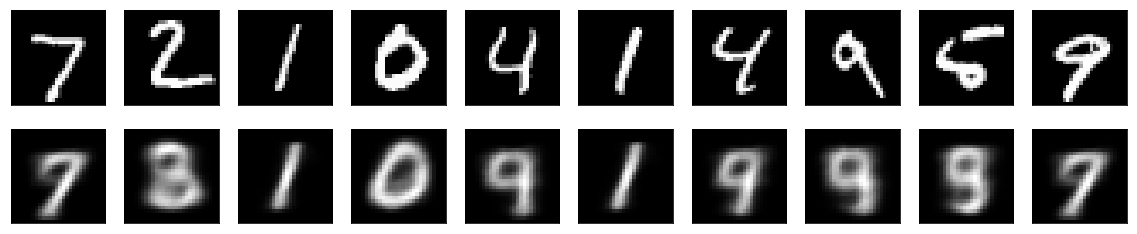

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16276138
total RMSE of each pixel:  0.21815677


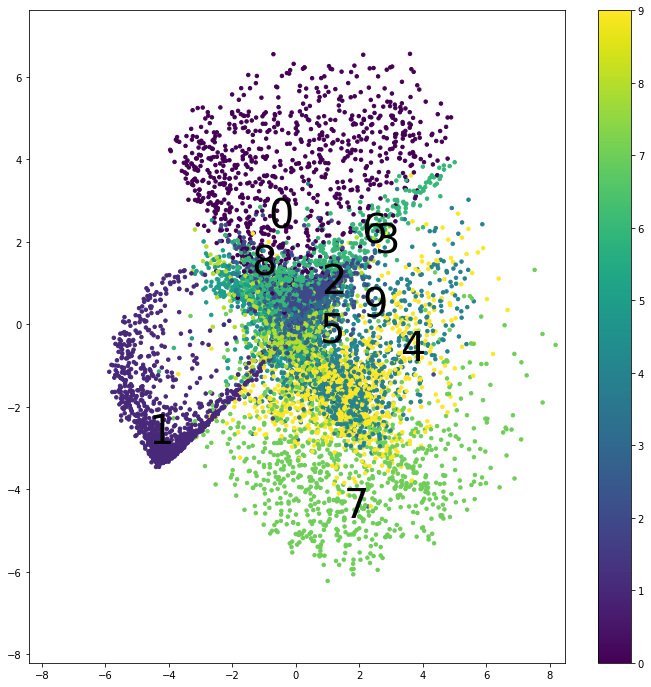

Silhouette score:  -0.007115884


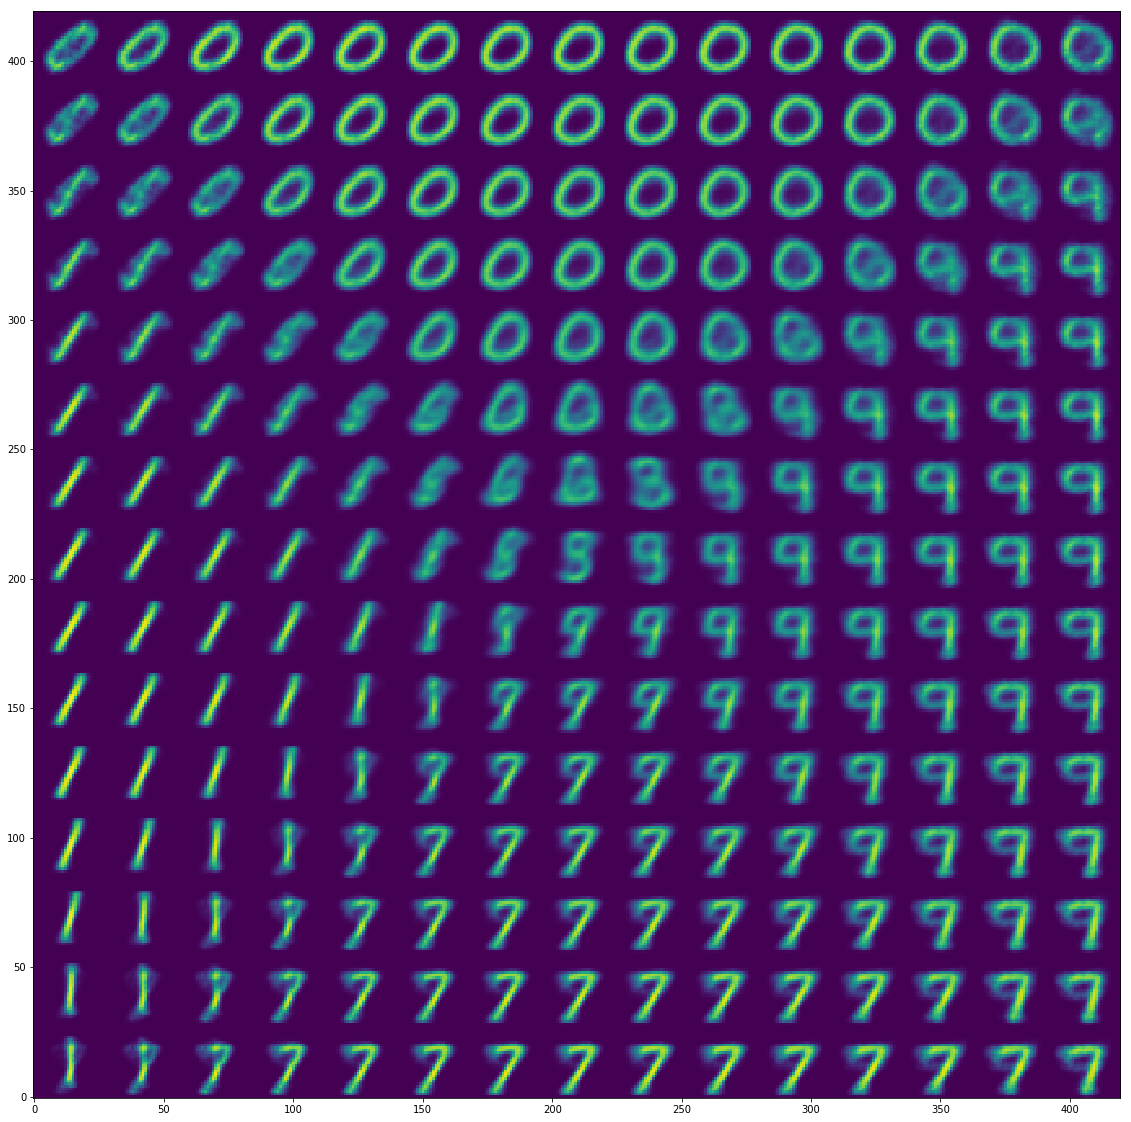

In [18]:
encoder = convAE.encoder
decoder = convAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Dense use different activation

In [19]:
actDense = "relu"

convAE = ConvAE(dimInput, actDense=actDense)
history, timeTrain = convAE.fit(xTrain, xTest, 
                                pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 35s 581us/step - loss: 0.2525 - val_loss: 0.2227

Epoch 00001: val_loss improved from inf to 0.22269, saving model to ../model/temp//AutoEncoder1536642768.155238.hdf5
Epoch 2/50
60000/60000 [==============================] - 29s 477us/step - loss: 0.2313 - val_loss: 0.2177

Epoch 00002: val_loss improved from 0.22269 to 0.21771, saving model to ../model/temp//AutoEncoder1536642768.155238.hdf5
Epoch 3/50
60000/60000 [==============================] - 29s 476us/step - loss: 0.2273 - val_loss: 0.2145

Epoch 00003: val_loss improved from 0.21771 to 0.21455, saving model to ../model/temp//AutoEncoder1536642768.155238.hdf5
Epoch 4/50
60000/60000 [==============================] - 28s 473us/step - loss: 0.2253 - val_loss: 0.2133

Epoch 00004: val_loss improved from 0.21455 to 0.21328, saving model to ../model/temp//AutoEncoder1536642768.155238.hdf5
Epoch 5/50
60000/60000 [==============

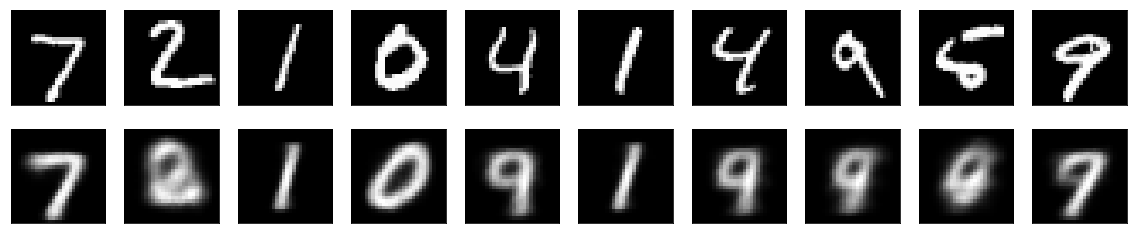

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.1616751
total RMSE of each pixel:  0.21600634


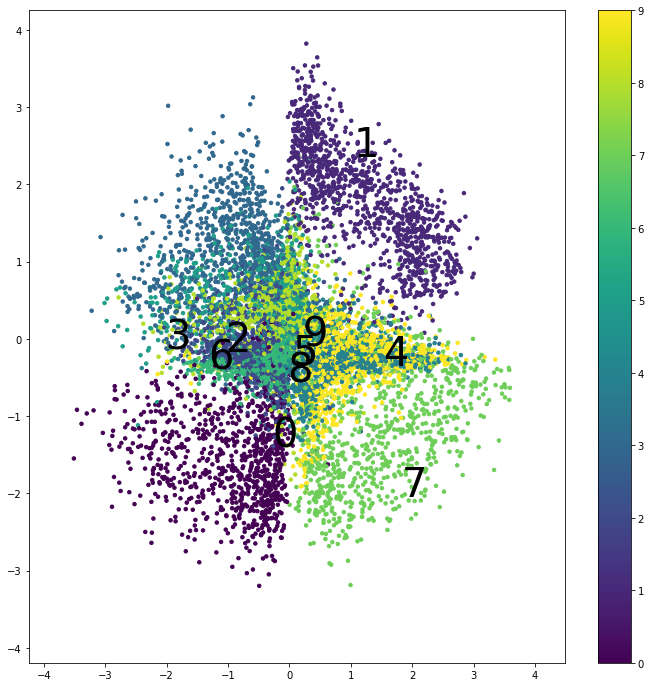

Silhouette score:  0.009701913


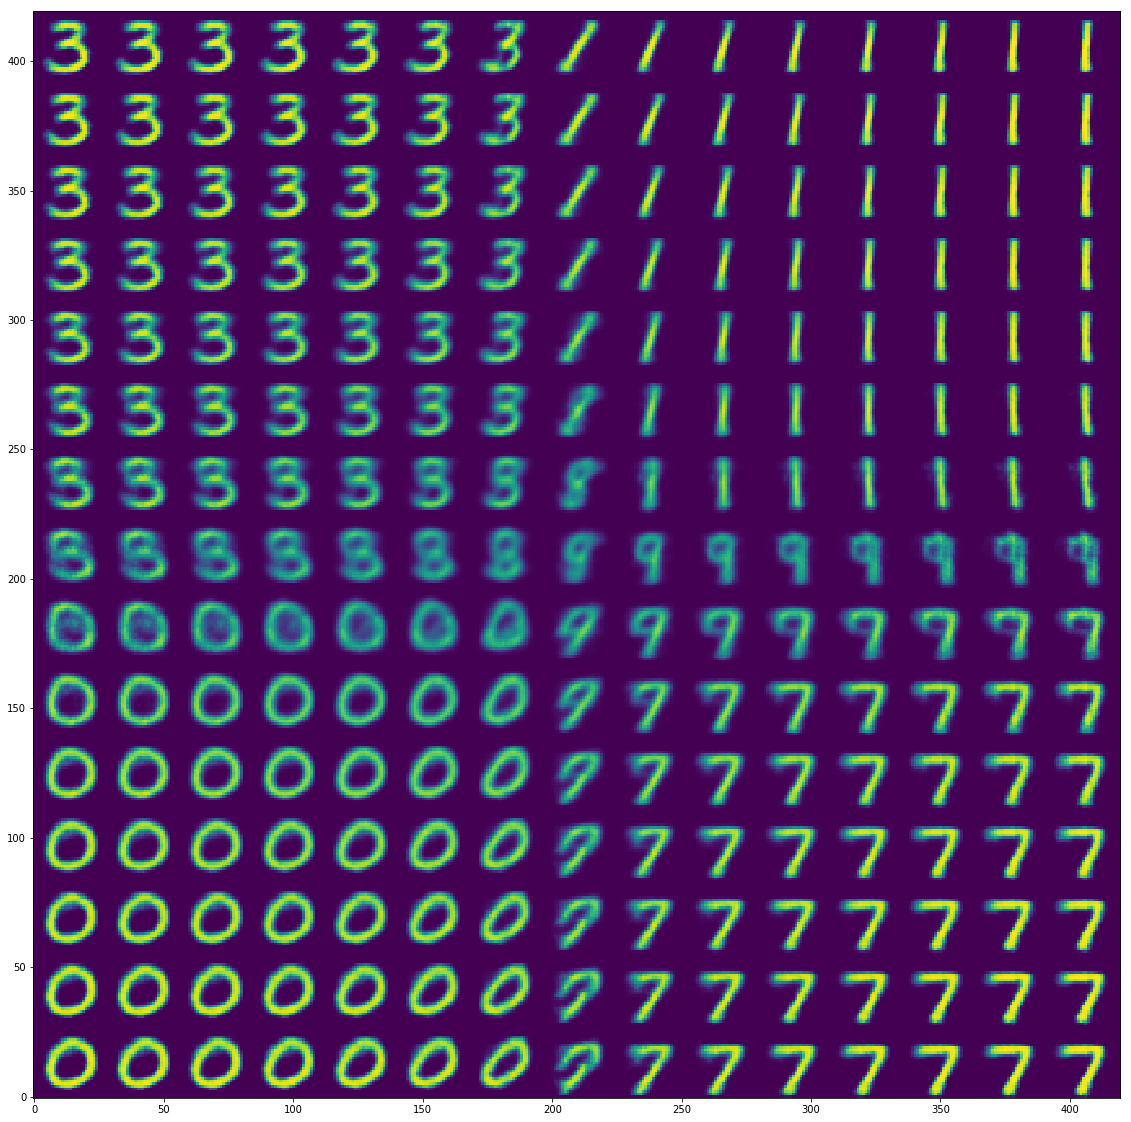

In [20]:
encoder = convAE.encoder
decoder = convAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Conv use different activation

In [21]:
actConv = "relu"

convAE = ConvAE(dimInput, actConv=actConv)
history, timeTrain = convAE.fit(xTrain, xTest, 
                                pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 36s 595us/step - loss: 0.2824 - val_loss: 0.2349

Epoch 00001: val_loss improved from inf to 0.23486, saving model to ../model/temp//AutoEncoder1536643335.4285057.hdf5
Epoch 2/50
60000/60000 [==============================] - 29s 483us/step - loss: 0.2406 - val_loss: 0.2272

Epoch 00002: val_loss improved from 0.23486 to 0.22717, saving model to ../model/temp//AutoEncoder1536643335.4285057.hdf5
Epoch 3/50
60000/60000 [==============================] - 29s 481us/step - loss: 0.2339 - val_loss: 0.2218

Epoch 00003: val_loss improved from 0.22717 to 0.22180, saving model to ../model/temp//AutoEncoder1536643335.4285057.hdf5
Epoch 4/50
60000/60000 [==============================] - 29s 476us/step - loss: 0.2298 - val_loss: 0.2191

Epoch 00004: val_loss improved from 0.22180 to 0.21913, saving model to ../model/temp//AutoEncoder1536643335.4285057.hdf5
Epoch 5/50
60000/60000 [==========

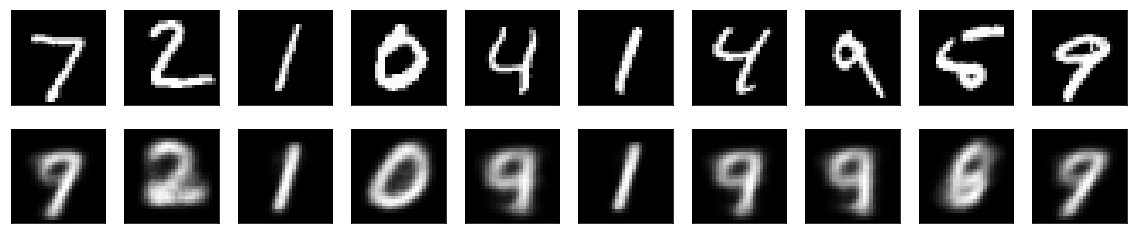

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16301423
total RMSE of each pixel:  0.21783546


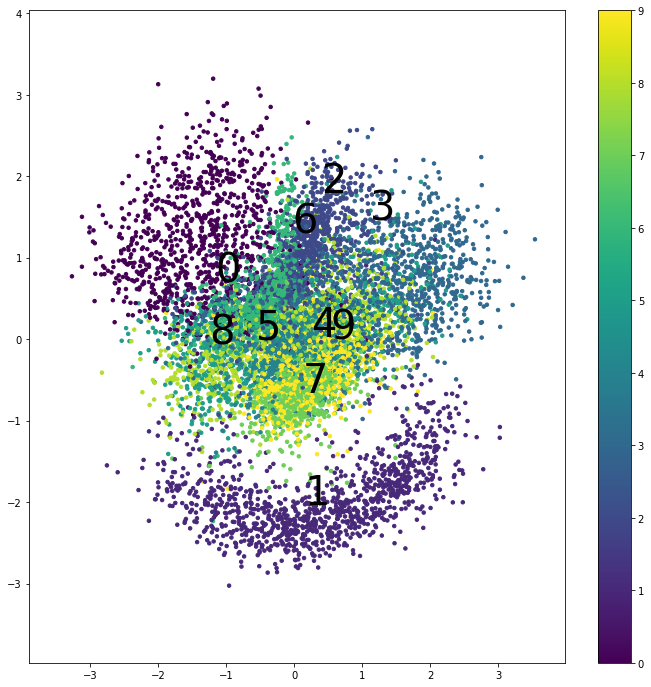

Silhouette score:  -0.012069609


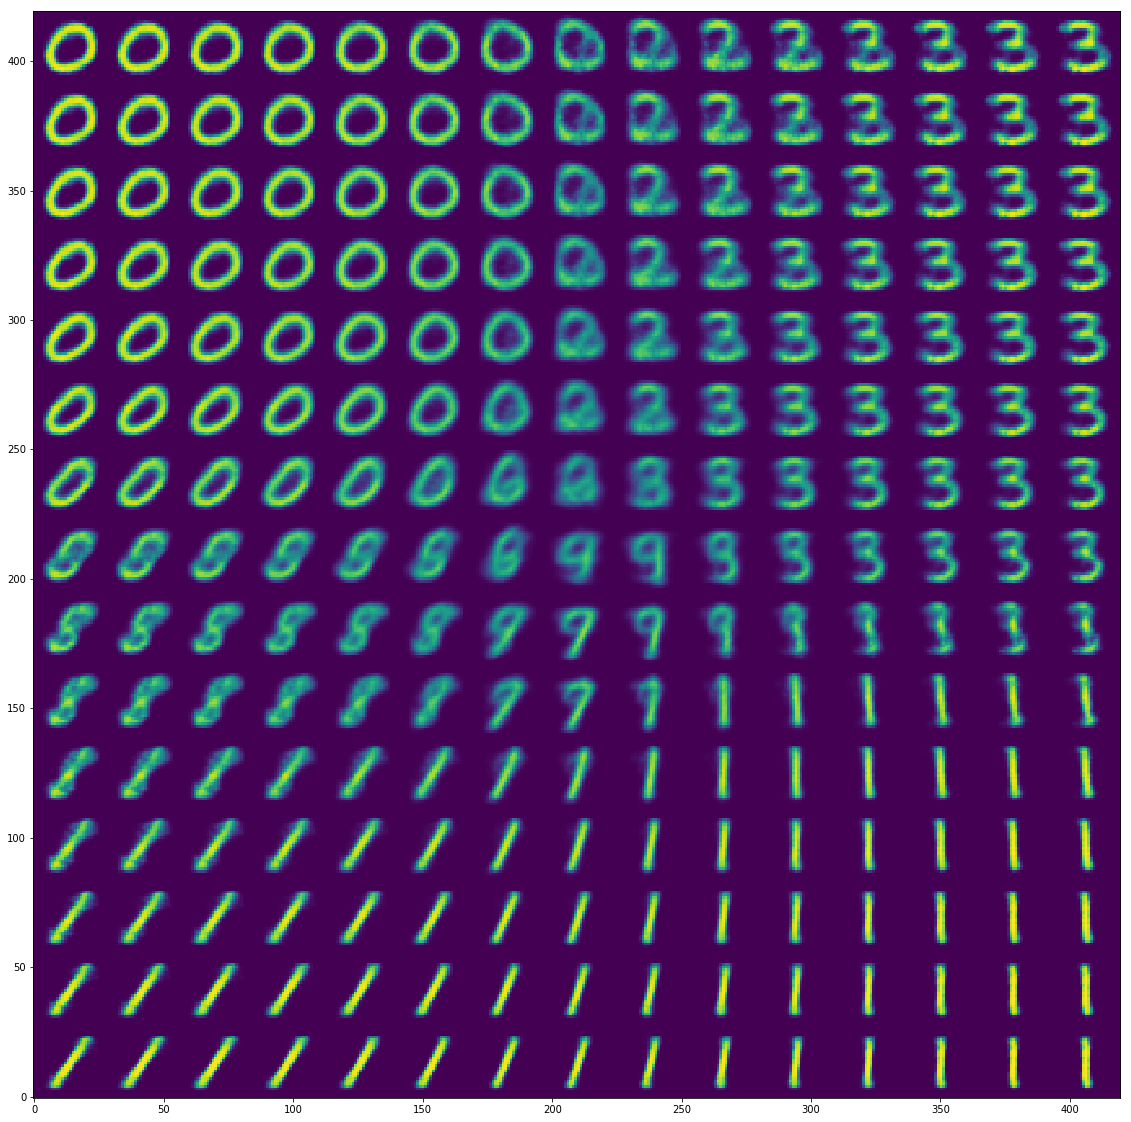

In [22]:
encoder = convAE.encoder
decoder = convAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Larger batch size

In [13]:
sizeBatch = 128

convVAE = ConvVAE(dimInput)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 sizeBatch=sizeBatch,
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.2641 - val_loss: 0.2260

Epoch 00001: val_loss improved from inf to 0.22601, saving model to ../model/temp//AutoEncoder.01-0.26-0.23.hdf5
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2305 - val_loss: 0.2213

Epoch 00002: val_loss improved from 0.22601 to 0.22128, saving model to ../model/temp//AutoEncoder.02-0.23-0.22.hdf5
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2271 - val_loss: 0.2192

Epoch 00003: val_loss improved from 0.22128 to 0.21918, saving model to ../model/temp//AutoEncoder.03-0.23-0.22.hdf5
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2246 - val_loss: 0.2169

Epoch 00004: val_loss improved from 0.21918 to 0.21689, saving model to ../model/temp//AutoEncoder.04-0.22-0.22.hdf5
Epoch 5/50
60000/60000 [==============================] - 4s 6

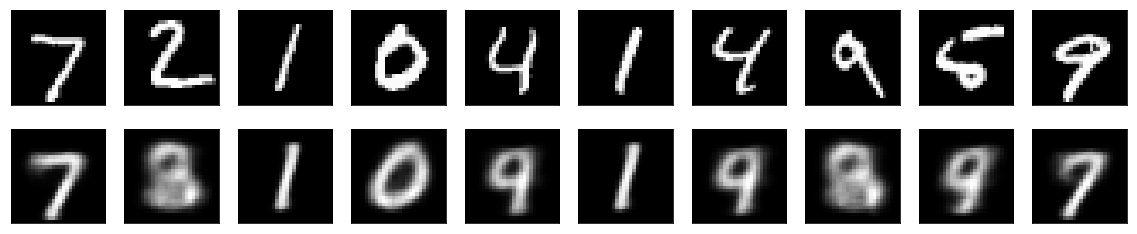

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.15990837
total RMSE of each pixel:  0.21436377


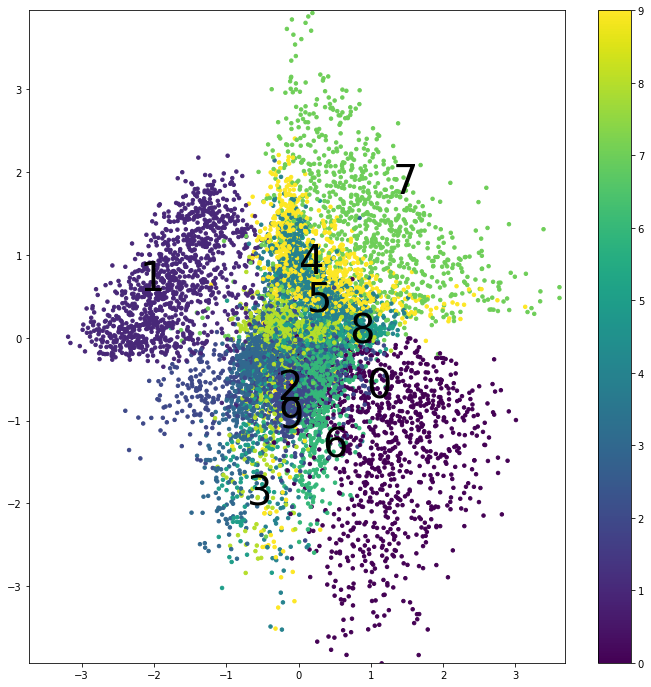

Silhouette score:  0.023617284


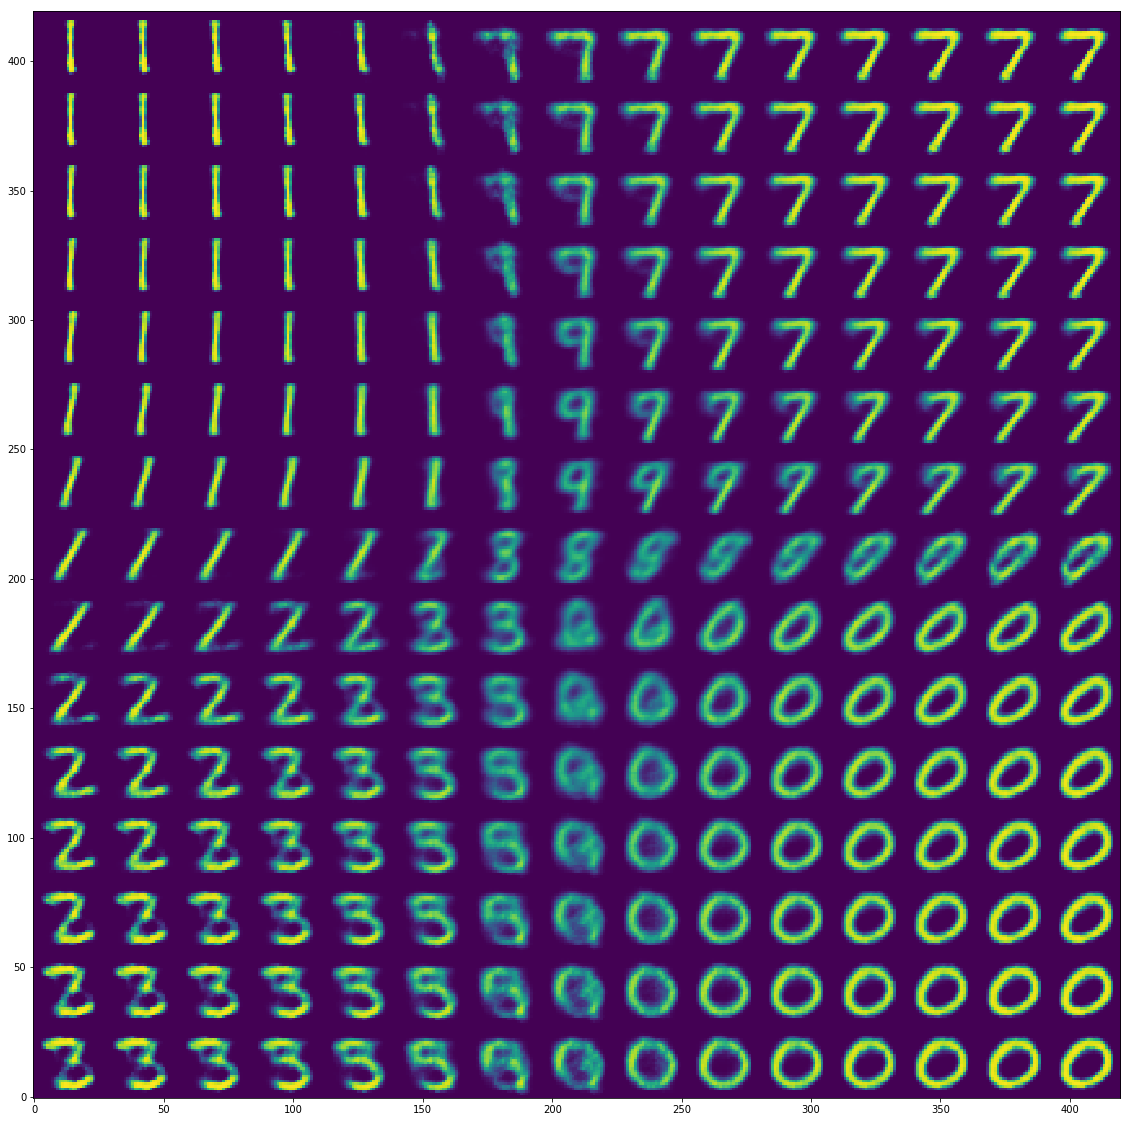

In [14]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# smaller batch size

In [18]:
sizeBatch = 8

convVAE = ConvVAE(dimInput)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 sizeBatch=sizeBatch,
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2316 - val_loss: 0.2181

Epoch 00001: val_loss improved from inf to 0.21813, saving model to ../model/temp//AutoEncoder.01-0.23-0.22.hdf5
Epoch 2/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2216 - val_loss: 0.2147

Epoch 00002: val_loss improved from 0.21813 to 0.21471, saving model to ../model/temp//AutoEncoder.02-0.22-0.21.hdf5
Epoch 3/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2189 - val_loss: 0.2112

Epoch 00003: val_loss improved from 0.21471 to 0.21122, saving model to ../model/temp//AutoEncoder.03-0.22-0.21.hdf5
Epoch 4/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2174 - val_loss: 0.2104

Epoch 00004: val_loss improved from 0.21122 to 0.21037, saving model to ../model/temp//AutoEncoder.04-0.22-0.21.hdf5
Epoch 5/50
60000/60000 [==============================] - 63s 

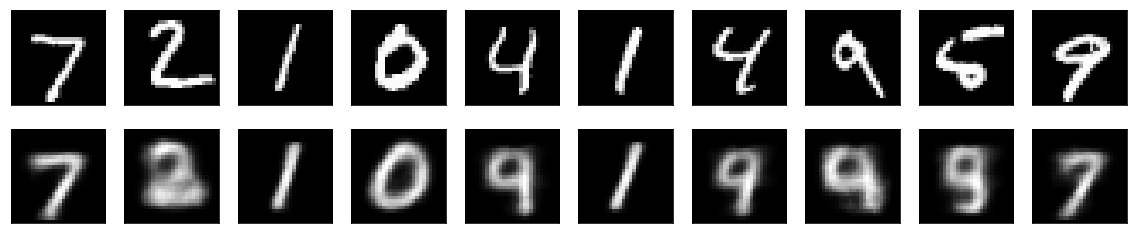

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16026847
total RMSE of each pixel:  0.21466215


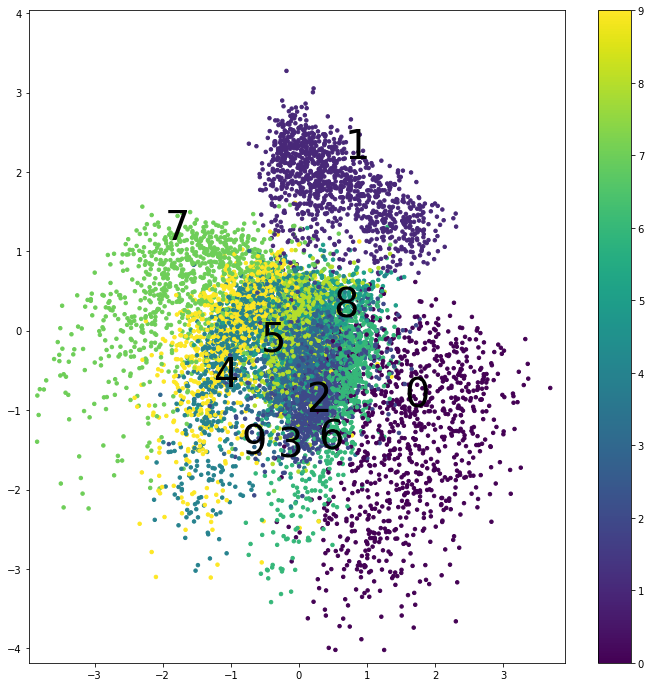

Silhouette score:  0.025928067


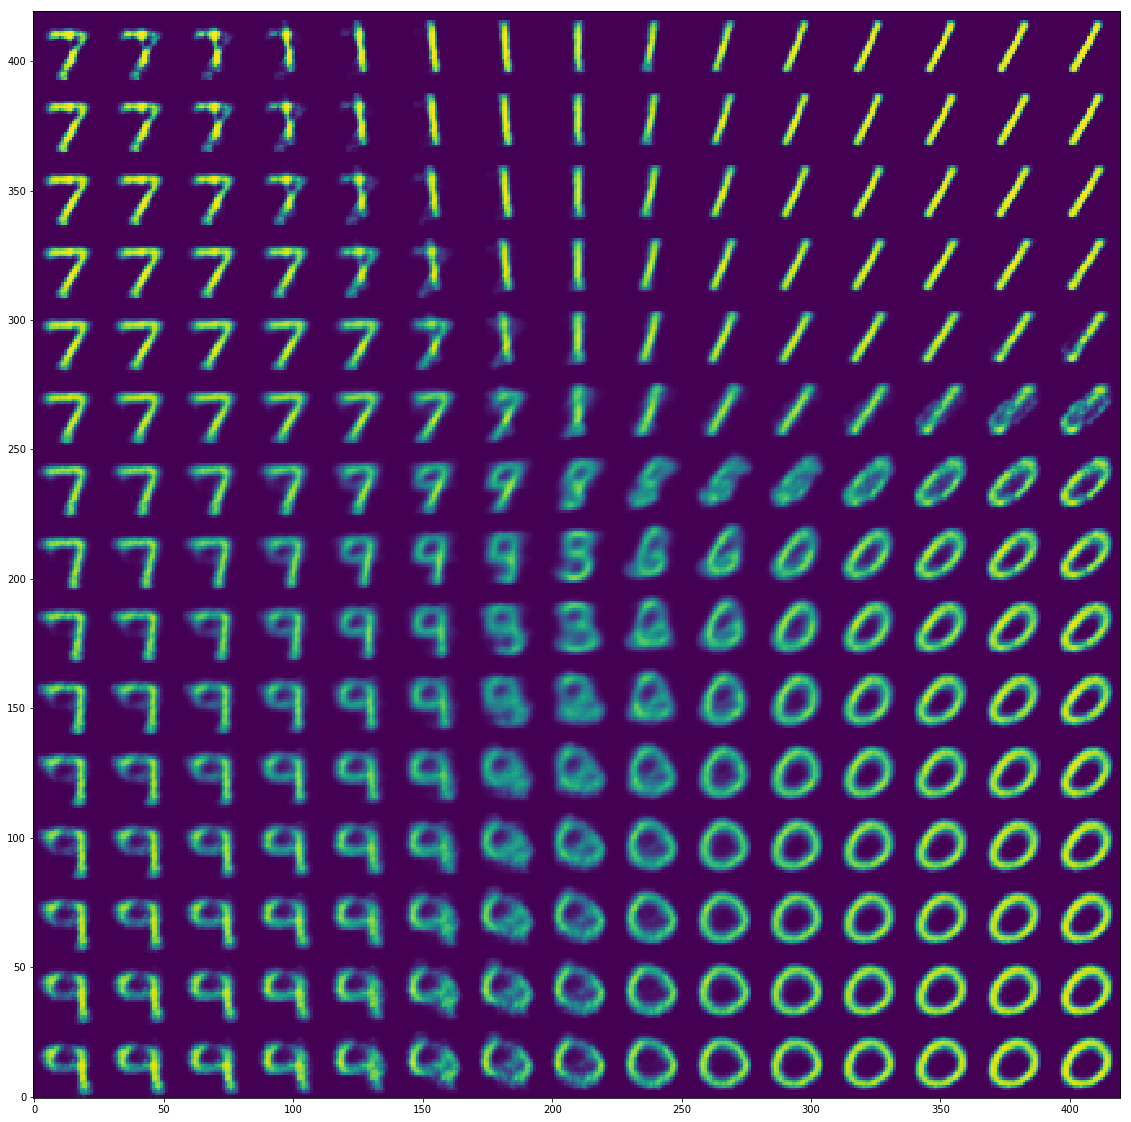

In [19]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Larger latent

In [20]:
layerDense = [128, 64]

convVAE = ConvVAE(dimInput, layerDense=layerDense)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 18s 301us/step - loss: 0.2317 - val_loss: 0.1962

Epoch 00001: val_loss improved from inf to 0.19621, saving model to ../model/temp//AutoEncoder.01-0.23-0.20.hdf5
Epoch 2/50
60000/60000 [==============================] - 16s 270us/step - loss: 0.2008 - val_loss: 0.1791

Epoch 00002: val_loss improved from 0.19621 to 0.17908, saving model to ../model/temp//AutoEncoder.02-0.20-0.18.hdf5
Epoch 3/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.1895 - val_loss: 0.1719

Epoch 00003: val_loss improved from 0.17908 to 0.17185, saving model to ../model/temp//AutoEncoder.03-0.19-0.17.hdf5
Epoch 4/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.1853 - val_loss: 0.1705

Epoch 00004: val_loss improved from 0.17185 to 0.17051, saving model to ../model/temp//AutoEncoder.04-0.19-0.17.hdf5
Epoch 5/50
60000/60000 [==============================

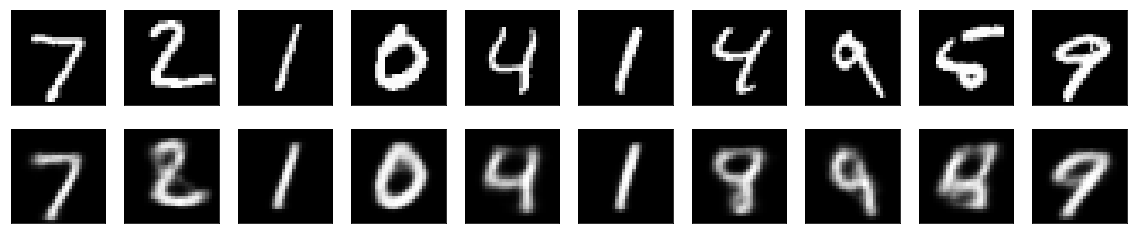

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.121082045
total RMSE of each pixel:  0.15964861


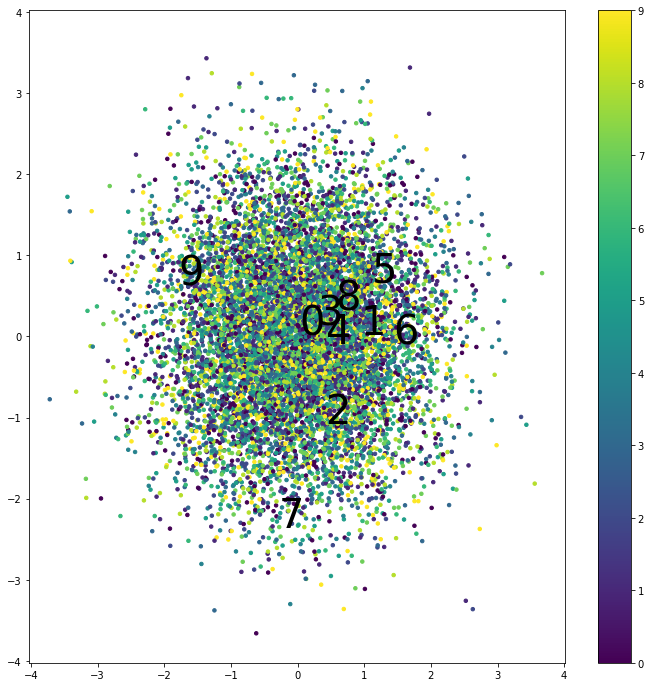

Silhouette score:  0.0061568962


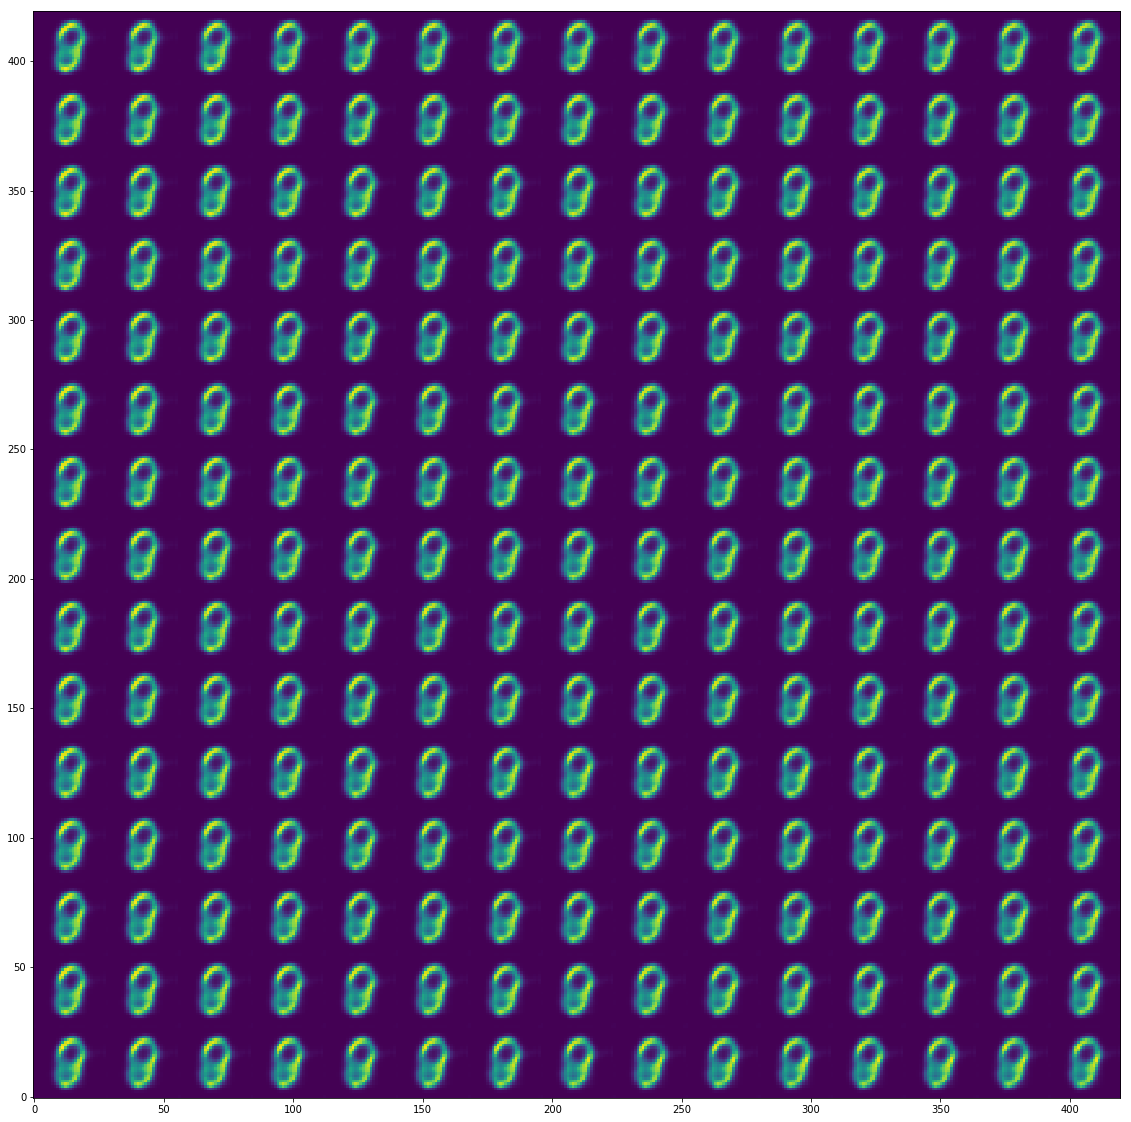

In [21]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Shallow layers

In [22]:
layerDense = [2]
layerConv=[8]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv=layerConv)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 225us/step - loss: 0.2654 - val_loss: 0.2411

Epoch 00001: val_loss improved from inf to 0.24110, saving model to ../model/temp//AutoEncoder.01-0.27-0.24.hdf5
Epoch 2/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.2501 - val_loss: 0.2396

Epoch 00002: val_loss improved from 0.24110 to 0.23961, saving model to ../model/temp//AutoEncoder.02-0.25-0.24.hdf5
Epoch 3/50
60000/60000 [==============================] - 12s 197us/step - loss: 0.2485 - val_loss: 0.2393

Epoch 00003: val_loss improved from 0.23961 to 0.23933, saving model to ../model/temp//AutoEncoder.03-0.25-0.24.hdf5
Epoch 4/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.2474 - val_loss: 0.2391

Epoch 00004: val_loss improved from 0.23933 to 0.23910, saving model to ../model/temp//AutoEncoder.04-0.25-0.24.hdf5
Epoch 5/50
60000/60000 [==============================

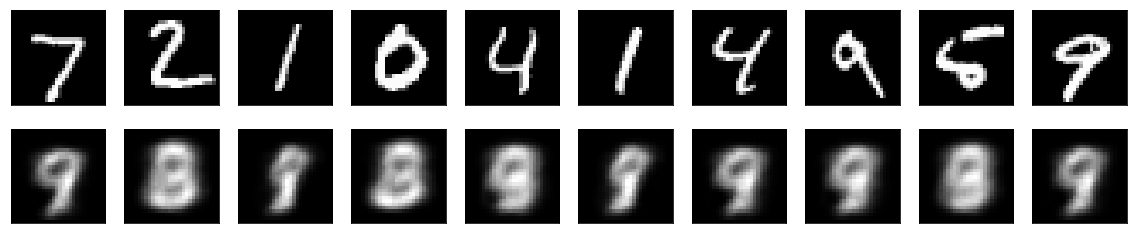

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.18042228
total RMSE of each pixel:  0.24325769


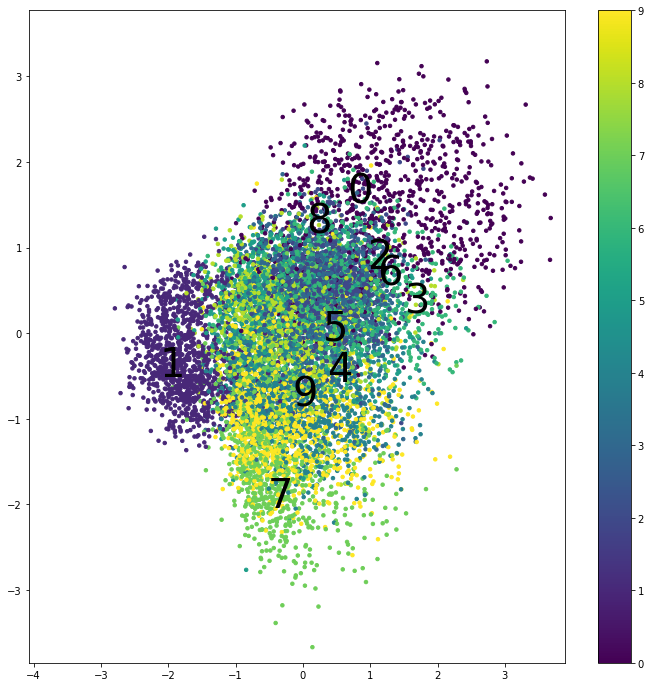

Silhouette score:  -0.023096364


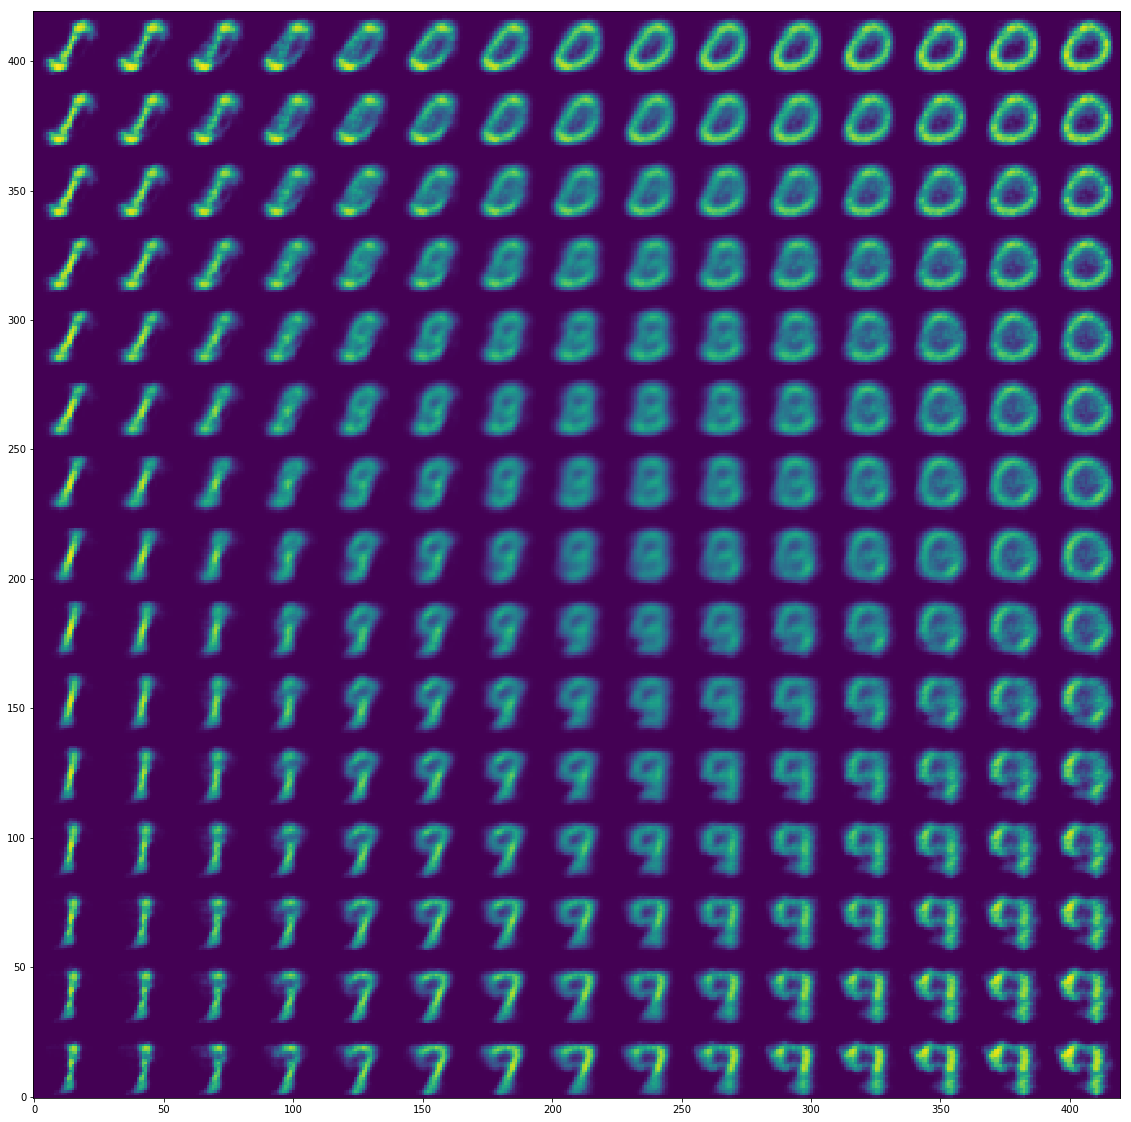

In [23]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)